### Let's see the train loss and test accuracy

In [2]:
## Made a stupid mistake - checkpoints were created at every 10th epoch. SO the curve will start from the 10th epoch.
## Should have saved the data at the first epoch

In [1]:
from __future__ import print_function


import os
import glob

import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import Normalize
from matplotlib.collections import LineCollection


torch.device('cpu')

device(type='cpu')

In [2]:
checkpoint_folder = './checkpoints'

In [3]:
checkpoint_files = glob.glob(f"{checkpoint_folder}/checkpoint*.pt")


In [5]:
# Initialize lists to store loss values and epochs
train_losses = []
test_losses = []
test_accuracy = []
epochs = []

for checkpoint_file in checkpoint_files:

    # Load the checkpoint
    checkpoint = torch.load(checkpoint_file)
    
    # Extract the loss values and epoch from the checkpoint
    checkpoint_train_losses  = checkpoint['train_loss']
    checkpoint_test_losses   = checkpoint['test_loss']
    checkpoint_test_accuracy = checkpoint['test_accuracy']

    checkpoint_epochs = checkpoint['epoch']
    
    # Append the loss values and epochs to the respective lists
    train_losses.append(checkpoint_train_losses)
    test_losses.append(checkpoint_test_losses)
    test_accuracy.append(checkpoint_test_accuracy)
    epochs.append(checkpoint_epochs)



In [6]:
# Zip the lists together based on epochs
zipped_data = list(zip(train_losses, test_losses, test_accuracy, epochs))

# Sort the zipped data based on epochs (ascending order)
zipped_data.sort(key=lambda x: x[-1])  # Assuming epochs are the last element in the tuple

# Unzip the sorted data back into separate lists
train_losses, test_losses, test_accuracy, epochs = zip(*zipped_data)

In [7]:
# Plot the loss curve
plt.rcParams["font.family"] = "Times New Roman"

sns.set_theme(style='whitegrid', palette='deep', font_scale=1, color_codes=True, rc=None)

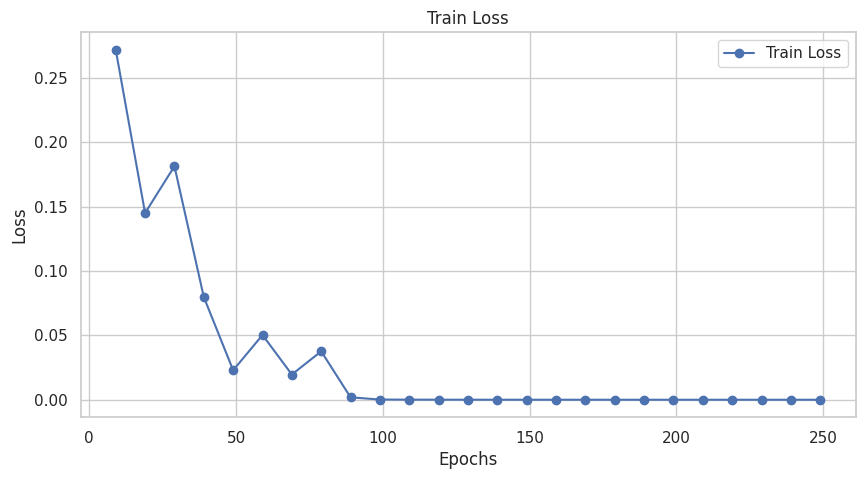

In [10]:
# Plot train_losses and test_losses vs epochs
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss')
plt.legend()
plt.grid(True)
plt.show()

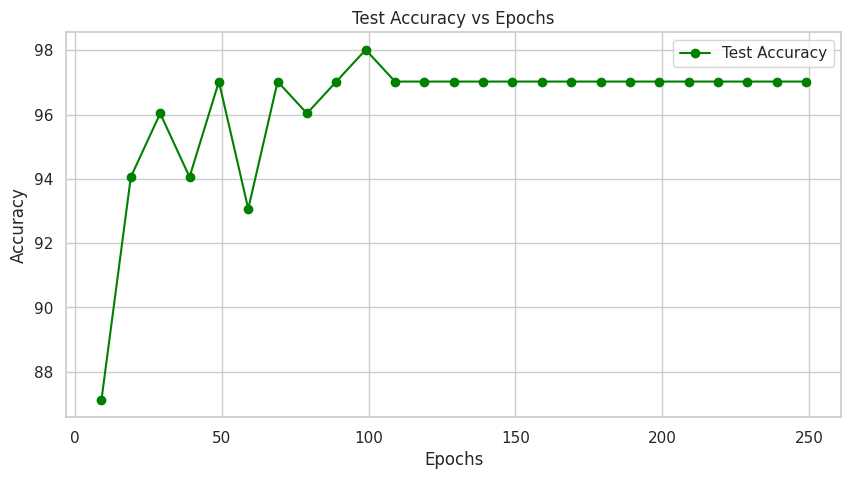

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(epochs, test_accuracy, label='Test Accuracy', marker='o', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
losses_file_path = './checkpoints/losses.pt'
losses = torch.load(losses_file_path)


In [21]:
losses['training_time']

62458.77479624748

In [22]:
training_time_hours = losses['training_time'] / 3600  # 3600 seconds in an hour

# Display the training time in hours
print(f"Training time: {training_time_hours:.2f} hours")

Training time: 17.35 hours
